In [1]:
# import dicts
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt

In [2]:
# here we load in our dictionary of player's serve and return statistics, scraped from atpworldtour.com
import cPickle as pickle
with open('stats_dict.p', 'rb') as fp:
    stats_dict = pickle.load(fp)

In [3]:
# function to convert dict of two-element vector scores into proper overall score; does not check for valid scores
def get_score(points):
    # unless we are in a tiebreaker, code converts point score from number format to tennis' 15-30-40-deuce format
    if points['game'] != [6,6]:
        point_score = [int(p)*15 for p in points['point']]
        for i in range(0,len(point_score)):
            if point_score[i] == 45:
                point_score[i] = 40
        if max(point_score) > 40:
            if point_score[0] > point_score[1]:
                point_score = ['AD','40']
            if point_score[0] < point_score[1]:
                point_score = ['40','AD']
            if point_score[0] == point_score[1]:
                point_score = ['40','40']
        return str(points['set'][0]) + '-' + str(points['set'][1]) + ', ' + str(points['game'][0]) +\
        '-' + str(points['game'][1]) + ', ' + str(point_score[0]) + '-' + str(point_score[1])
    else:
        return str(points['set'][0]) + '-' + str(points['set'][1]) + ', ' + str(points['game'][0]) +\
        '-' + str(points['game'][1]) + ', ' + str(points['point'][0]) + '-' + str(points['point'][1])


In [4]:
# check to see if a game should be over in tennis
# I will first write this treating the tiebreaker as a typical fifteenth game with a single server
# then I will later update it to reflect an actual tiebreaker
score = {}
score['set'] = [1,0]
score['game'] = [6,6]
score['point'] = [7,9]

def check_score(points):
    # first we check the points score
    #if max(points['point']) == 0:
    #    print str(names[server]) + ' serving'
    
    # if we are not in a tiebreaker, proceed with regular scoring
    if points['game'] != [6,6]:
        if max(points['point']) < 4:
            return points
        if max(points['point']) >= 4:
            if (max(points['point'])-min(points['point'])) < 2:
                return points
            else:
                # if the difference in points is 2, we reset the point score and update the game score
                if points['point'][0] > points['point'][1]:
                    points['game'][0] += 1
                    # I switch the server after any time the game score is updated
                    index = server_I.next()
                    global server
                    global serving
                    server = serving[index]
                if points['point'][1] > points['point'][0]:
                    points['game'][1] += 1
                    index = server_I.next()
                    global server
                    global serving
                    server = serving[index]
                points['point'] = [0,0]
    #if we are in a tiebreaker, switch serve every two points and end once a player gets to seven and wins by two
    elif points['game'] == [6,6]:
        # now check if tiebreak should be over
        if max(points['point']) >= 7 and ((max(points['point'])-min(points['point'])) >= 2):
            if points['point'][0] > points['point'][1]:
                points['game'][0] += 1
                # I switch the server after any time the game score is updated
                index = server_I.next()
                global server
                global serving
                server = serving[index]
            if points['point'][1] > points['point'][0]:
                points['game'][1] += 1
                index = server_I.next()
                global server
                global serving
                server = serving[index]
            points['point'] = [0,0]
        # otherwise, tiebreak continues
        else:
            return points
            
    # now we check the game score
    if max(points['game']) < 6:
        return points
    if points['game'] == [6,6] and points['point'] == [0,0]:
        return points
    # my next logical statement covers all cases where a player has reached 6 or more games except 6-5
    if (max(points['game']) - min(points['game'])) >= 2 or max(points['game']) == 7:
        if points['game'][0] > points['game'][1]:
            points['set'][0] += 1
            #print str(names[server]) + ' serving'
        if points['game'][1] > points['game'][0]:
            points['set'][1] += 1
            #print str(names[server]) + ' serving'
        points['game'] = [0,0]

    # now we check the set score
    if max(points['set']) < 2:
        return points
    else:
        #print "Game, Set, Match."
        return points


<ipython-input-4-f8f1b9115c33>:33: SyntaxWarning: name 'server' is assigned to before global declaration
  global server
<ipython-input-4-f8f1b9115c33>:34: SyntaxWarning: name 'serving' is used prior to global declaration
  global serving
<ipython-input-4-f8f1b9115c33>:45: SyntaxWarning: name 'server' is assigned to before global declaration
  global server
<ipython-input-4-f8f1b9115c33>:46: SyntaxWarning: name 'serving' is used prior to global declaration
  global serving
<ipython-input-4-f8f1b9115c33>:51: SyntaxWarning: name 'server' is assigned to before global declaration
  global server
<ipython-input-4-f8f1b9115c33>:52: SyntaxWarning: name 'serving' is used prior to global declaration
  global serving


In [5]:
def point(first_serve_perc,first_serve_win,second_serve_win,score):
    rando = np.random.uniform()
    if rando < first_serve_perc:
        point = np.random.binomial(1,first_serve_win)
    if rando > first_serve_perc:
        point = np.random.binomial(1,second_serve_win)
    #point_chex.append(point)
    # depending on who is serving, I must assign the won and lost points accordingly
    if (point == 1 and server == 'p1') or (point == 0 and server == 'p2'):
        score[0] += 1
    else:
        score[1] += 1
    return score


In [6]:
# let's get started

def simulate(mast_dict,p1,p2):
    outcomes = []
    
    # set up indicator variable to designate who is serving
    global server_I
    server_I = cycle(range(2))
    # set up dict so I can index my iterator to find the server in a given game
    global serving
    serving = ['p1','p2']
    global server
    
    # flip a coin to get this match started
    if np.random.uniform(0,1) > .5:
        print "%s to serve" % (p1)
        index = server_I.next()
        server = serving[index]
    else:
        print "%s to serve" % (p2)
        server_I.next()
        index = server_I.next()
        server = serving[index]

    # initialize empty scoreboards
    score = {}
    score['set'] = [0,0]
    score['game'] = [0,0]
    score['point'] = [0,0]

    # now we get the party started...
    while max(check_score(score)['set']) < 2:
        
        score['point'] = point(mast_dict[server]['1st_serve%'],mast_dict[server]['1st_serve_win'],mast_dict[server]['2nd_serve_win'],score['point'])
        score = check_score(score)
        # checker
        if score['game'] == [6,6] and sum(score['point'])%2 == 1:
            index = server_I.next()
            global server
            global serving
            server = serving[index]
            
    if max(check_score(score)['set']) == 2:
        global names
        if check_score(score)['set'][0] == 2:
            wins[0] += 1
            print names['p1'] + ' wins.'
        else:
            wins[1] += 1
            print names['p2'] + ' wins'
    
        
# tennis_score = get_score(score)
    # print tennis_score
    # we'll really want to use check_score(score) so we can display the real tennis scores

### point(.60,.80,.55,score)

<ipython-input-6-8eaf0bcc0086>:39: SyntaxWarning: name 'server' is assigned to before global declaration
  global server
<ipython-input-6-8eaf0bcc0086>:40: SyntaxWarning: name 'serving' is assigned to before global declaration
  global serving


In [7]:
def n_match_simulator(player_1,player_2,year,surface,n):
    # names dict for future reference
    global names 
    names = {'p1': player_1,'p2': player_2}
    global wins
    wins = [0,0]
    
    # split our dictionary into five dataframes for each relevant player statistic
    first_perc = stats_dict['1st-serve'][surface][year]
    first_serve = stats_dict['1st-serve-points-won'][surface][year]
    second_serve = stats_dict['2nd-serve-points-won'][surface][year]
    first_return = stats_dict['1st-serve-return-points-won'][surface][year]
    second_return = stats_dict['2nd-serve-return-points-won'][surface][year]
    
    # extract serve and return percentages for player 1 and player 2 from the database
    player1_info = {'1st_serve%':first_perc.loc[first_perc['player'] == player_1]['1st-serve'].values[0],\
                '1st_serve_win':first_serve.loc[first_serve['player'] == player_1]['1st-serve-points-won'].values[0],\
                '2nd_serve_win':second_serve.loc[second_serve['player'] == player_1]['2nd-serve-points-won'].values[0],\
                '1st_return_win':first_return.loc[first_return['player'] == player_1]['1st-serve-return-points-won'].values[0],\
                '2nd_return_win':second_return.loc[second_return['player'] == player_1]['2nd-serve-return-points-won'].values[0]}

    player2_info = {'1st_serve%':first_perc.loc[first_perc['player'] == player_2]['1st-serve'].values[0],\
                '1st_serve_win':first_serve.loc[first_serve['player'] == player_2]['1st-serve-points-won'].values[0],\
                '2nd_serve_win':second_serve.loc[second_serve['player'] == player_2]['2nd-serve-points-won'].values[0],\
                '1st_return_win':first_return.loc[first_return['player'] == player_2]['1st-serve-return-points-won'].values[0],\
                '2nd_return_win':second_return.loc[second_return['player'] == player_2]['2nd-serve-return-points-won'].values[0]}


    player1_dict = {}
    player2_dict = {}


    # normalize percentages by dividing each by sum of players' two stats (eg 1st serve win pct and 1st serve return pct)
    # the new serve winning percentages reflect a combination of the server and returner's relative effectiveness
    player1_dict['1st_serve_win'] = player1_info['1st_serve_win']/float(player1_info['1st_serve_win']+player2_info['1st_return_win'])
    player2_dict['1st_serve_win'] = player2_info['1st_serve_win']/float(player2_info['1st_serve_win']+player1_info['1st_return_win'])
    player1_dict['2nd_serve_win'] = player1_info['2nd_serve_win']/float(player1_info['2nd_serve_win']+player2_info['2nd_return_win'])
    player2_dict['2nd_serve_win'] = player2_info['2nd_serve_win']/float(player2_info['2nd_serve_win']+player1_info['2nd_return_win'])
    player1_dict['1st_serve%'] = player1_info['1st_serve%']
    player2_dict['1st_serve%'] = player2_info['1st_serve%']


    mast_dict = {}
    mast_dict['p1'] = player1_dict
    mast_dict['p2'] = player2_dict
    
    
    
    for i in range(0,n):
        simulate(mast_dict,player_1,player_2)
    print player_1 + ": " + str(wins[0]) + " wins"
    print player_2 + ": " + str(wins[1]) + " wins"
    
n_match_simulator('rafael-nadal','roger-federer',2011,'clay',1000)    

    

rafael-nadal to serve
roger-federer wins
roger-federer to serve
rafael-nadal wins.
roger-federer to serve
rafael-nadal wins.
rafael-nadal to serve
rafael-nadal wins.
rafael-nadal to serve
rafael-nadal wins.
roger-federer to serve
roger-federer wins
rafael-nadal to serve
rafael-nadal wins.
rafael-nadal to serve
rafael-nadal wins.
rafael-nadal to serve
rafael-nadal wins.
rafael-nadal to serve
rafael-nadal wins.
rafael-nadal to serve
roger-federer wins
roger-federer to serve
roger-federer wins
roger-federer to serve
roger-federer wins
roger-federer to serve
rafael-nadal wins.
rafael-nadal to serve
rafael-nadal wins.
rafael-nadal to serve
rafael-nadal wins.
rafael-nadal to serve
roger-federer wins
rafael-nadal to serve
roger-federer wins
rafael-nadal to serve
roger-federer wins
rafael-nadal to serve
roger-federer wins
roger-federer to serve
rafael-nadal wins.
roger-federer to serve
roger-federer wins
roger-federer to serve
rafael-nadal wins.
roger-federer to serve
rafael-nadal wins.
roger-

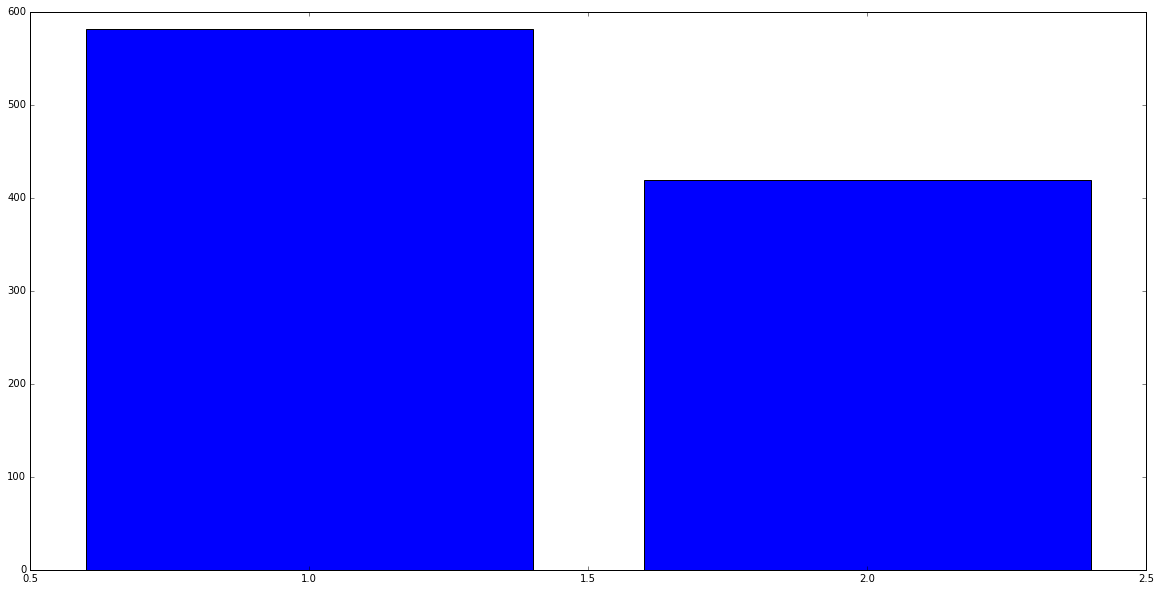

In [11]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.bar([1,2], wins, align='center')
plt.show()